In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define Directory
Diri = "data/orig/"
#
# Open Temp and Precip Slopes Datasets
i = 0
Net_TOA_Slopes_DF = pandas.read_csv("./"+"CSV/Net_TOA_Slopes.csv")
Precip_Slopes_DF = pandas.read_csv("./"+"CSV/Precip_Slopes.csv")
print (Precip_Slopes_DF)

   Unnamed: 0  MPIESM12  MPIESM11  IPSLCM5A   HadGEM2   HadCM3L   GISSE2R  \
0           0  2.300254  2.148782  2.506921  1.858607  2.083445  3.246339   
1           1  1.747053  1.896656  2.608439  2.058915  2.458468  2.259853   
2           2  1.776542  1.740586  2.165837  1.740883  1.968979  2.167821   

     FAMOUS  ECHAM5MPIOM  CNRMCM61   CESM104   CCSM3II     CCSM3  
0  2.008948     2.103425  2.031688  2.162148  2.459821  2.293043  
1  1.727227     2.228182  2.115238  2.238214  2.319025  1.662571  
2  1.818750     2.139424  1.839649  2.139773  1.859323  1.440258  


In [28]:
#
# Define Variables of Research
# Near Surface Air Temperature
Var1 = "tas"
Temp_Files = os.listdir(Diri+Var1+"/global/")
# Net Radiative Flux at Top of Atmosphere
Var2 = "netTOA"
Net_TOA_Files = os.listdir(Diri+Var2+"/global/")
# Precipitation
Var3 = "pr"
Precip_Files = os.listdir(Diri+Var3+"/global/")
# Upwelling Longwave Radiative Flux at Surface
Var4 = "rlus"
Up_LW_Sfc_Files = os.listdir(Diri+Var4+"/global/")
# Downwelling Longwave Radiative Flux at Surface
Var5 = "rlds"
Down_LW_Sfc_Files = os.listdir(Diri+Var5+"/global/")
# Upwelling Shortwave Radiative Flux at Surface
Var6 = "rsus"
Up_SW_Sfc_Files = os.listdir(Diri+Var6+"/global/")
# Downwelling Shortwave Radiative Flux at Surface
Var7 = "rsds"
Down_SW_Sfc_Files = os.listdir(Diri+Var7+"/global/")
# Upwelling Longwave Radiative Flux at TOA
Var8 = "rlut"
Up_LW_TOA_Files = os.listdir(Diri+Var8+"/global/")
# Upwelling Shortwave Radiative Flux at TOA
Var9 = "rsut"
Up_SW_TOA_Files = os.listdir(Diri+Var9+"/global/")
# Downwelling Shortwave Radiative Flux at TOA
Var10 = "rsdt"
Down_SW_TOA_Files = os.listdir(Diri+Var10+"/global/")
# Sensible Heat Flux at Surface
Var11 = "hfss"
Sensi_Sfc_Files = os.listdir(Diri+Var11+"/global/")
# Latent Heat Flux at Surface
Var12 = "hfls"
Latent_Sfc_Files = os.listdir(Diri+Var12+"/global/")

In [29]:
# Open Temperature Files
for File in Temp_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Temp_Files.remove(File)

In [30]:
# Open Upwelling Longwave Surface Radiative Flux Files
for File in Up_LW_Sfc_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Up_LW_Sfc_Files.remove(File)

In [31]:
# Open Downwelling Longwave Surface Radiative Flux Files
for File in Down_LW_Sfc_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Down_LW_Sfc_Files.remove(File)

In [32]:


# Open Upwelling Shortwave Surface Radiative Flux Files
for File in Up_SW_Sfc_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Up_SW_Sfc_Files.remove(File)
# Open Downwelling Shortwave Surface Radiative Flux Files
for File in Down_SW_Sfc_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Down_SW_Sfc_Files.remove(File)

In [33]:
# Open Upwelling Longwave TOA Radiative Flux Files
for File in Up_LW_TOA_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Up_LW_TOA_Files.remove(File)
# Open Upwelling Shortwave TOA Radiative Flux Files
for File in Up_SW_TOA_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Up_SW_TOA_Files.remove(File)
# Open Downwelling Shortwave TOA Radiative Flux Files
for File in Down_SW_TOA_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Down_SW_TOA_Files.remove(File)
# Open Sensible Heat Flux Surface Radiative Flux Files
for File in Sensi_Sfc_Files:
    Parts = File.split("_")
    Model = Parts[1]
    Experimenat = Parts[2]
    Time = Parts[3].split(".")[0]
    if Time=="150":
        Sensi_Sfc_Files.remove(File)
# Open Latent Heat Flux Surface Radiative Flux Files
for File in Latent_Sfc_Files:
    Parts = File.split("_")
    if Parts[0] == "hfls":
        Model = Parts[1]
        Experiment = Parts[2]
        Time = Parts[3].split(".")[0]
        if Time=="150":
            Latent_Sfc_Files.remove(File)

In [34]:
# Create Pertubations Library
Perturbations = {} 
for File in Temp_Files: 
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    if Experiment!="control": 
        if Model in list(Perturbations):
            Perturbations[Model].append(Experiment)
        else:
            Perturbations[Model] = [Experiment]
print (Perturbations)
#
# Create Abrupt 4x Pertubations Library
Pert_4x = {}
for File in Temp_Files: 
    Parts = File.split("_")
    Model = Parts[1]
    Experiment = Parts[2]
    if Experiment!="control": 
        if Experiment=="abrupt4x" or Experiment=="abrupt1400ppm":
            Pert_4x[Model] = Experiment
print (Pert_4x)
#
# Define Number of Datasets
Num_Datasets = len(Pert_4x)
print (Num_Datasets)

{'MPIESM12': ['abrupt4x'], 'GISSE2R': ['abrupt4x'], 'IPSLCM5A': ['abrupt4x'], 'CCSM3': ['abrupt4x'], 'HadGEM2': ['abrupt4x'], 'CESM104': ['abrupt4x'], 'CCSM3II': ['abrupt1400ppm'], 'ECHAM5MPIOM': ['abrupt4x'], 'FAMOUS': ['abrupt4x'], 'CNRMCM61': ['abrupt4x'], 'HadCM3L': ['abrupt4x'], 'MPIESM11': ['abrupt4x']}
{'MPIESM12': 'abrupt4x', 'GISSE2R': 'abrupt4x', 'IPSLCM5A': 'abrupt4x', 'CCSM3': 'abrupt4x', 'HadGEM2': 'abrupt4x', 'CESM104': 'abrupt4x', 'CCSM3II': 'abrupt1400ppm', 'ECHAM5MPIOM': 'abrupt4x', 'FAMOUS': 'abrupt4x', 'CNRMCM61': 'abrupt4x', 'HadCM3L': 'abrupt4x', 'MPIESM11': 'abrupt4x'}
12


In [35]:
# Create List of Models
Model_List = ['MPIESM12', 'MPIESM11', 'IPSLCM5A', 'HadGEM2', 'HadCM3L', 'GISSE2R', 'FAMOUS', 'ECHAM5MPIOM', \
'CNRMCM61', 'CESM104', 'CCSM3II', 'CCSM3']
print (Model_List)

['MPIESM12', 'MPIESM11', 'IPSLCM5A', 'HadGEM2', 'HadCM3L', 'GISSE2R', 'FAMOUS', 'ECHAM5MPIOM', 'CNRMCM61', 'CESM104', 'CCSM3II', 'CCSM3']


In [36]:
# Create Function to Open Temperature Files
def Open_Temp_Files(Temp_Files, Model):
# Open Temperature Control Files
    Temp_Control_Filename = [i for i in Temp_Files if i.startswith("tas_"+Model+"_"+"control"+"_")][0]
    Temp_Control_Data = xr.open_dataset(Diri+"tas/global/"+Temp_Control_Filename)
    Temp_Control = Temp_Control_Data.tas
    Years_Control = range(len(Temp_Control))
#
# Open Temperature 4x Files
    Temp_4x_Filename = [i for i in Temp_Files if i.startswith("tas_"+Model+"_"+Pert_4x[Model]+"_")][0]
    Temp_4x_Data = xr.open_dataset(Diri+"tas/global/"+Temp_4x_Filename)
    Temp_4x = Temp_4x_Data.tas
    Years_4x = range(len(Temp_4x))
#
# Return Results
    return (Temp_Control, Years_Control, Temp_4x, Years_4x)

In [37]:
# Create Function to Create Smoothen Temperature 4x and Control Lines
def Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model):
### Take the difference of each time step to the time-averaged control simulation imbalance
    Temp_Control_Smooth = Temp_Control.mean() + Temp_4x*0
#
# Return Results
    return (Temp_Control_Smooth)

In [38]:
# Create Function to Open Upwell Longwave Surface Files
def Open_Up_LW_Sfc_Files(Up_LW_Sfc_Files, Model):
# Open Upwell Longwave Surface 4x Files
    try:
        Up_LW_Sfc_4x_Filename = [i for i in Up_LW_Sfc_Files if i.startswith("rlus_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Up_LW_Sfc_4x_Data = xr.open_dataset(Diri+"rlus/global/"+Up_LW_Sfc_4x_Filename)
        Up_LW_Sfc_4x = Up_LW_Sfc_4x_Data.rlus
        Years_4x = range(len(Up_LW_Sfc_4x))
    except:
        Up_LW_Sfc_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Upwell Longwave Surface Control Files
    try:
        Up_LW_Sfc_Control_Filename = [i for i in Up_LW_Sfc_Files if i.startswith("rlus_"+Model+"_"+"control"+"_")][0]
        Up_LW_Sfc_Control_Data = xr.open_dataset(Diri+"rlus/global/"+Up_LW_Sfc_Control_Filename)
        Up_LW_Sfc_Control = Up_LW_Sfc_Control_Data.rlus
        Years_Control = range(len(Up_LW_Sfc_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Up_LW_Sfc_Control = numpy.nan
        Years_Control = numpy.nan
#

# Return Results
    return (Up_LW_Sfc_Control, Years_Control, Up_LW_Sfc_4x, Years_4x)

In [39]:
# Create Function to Open Downwell Longwave Surface Files
def Open_Down_LW_Sfc_Files(Down_LW_Sfc_Files, Model):
# Open Downwell Longwave Surface 4x Files
    try:
        Down_LW_Sfc_4x_Filename = [i for i in Down_LW_Sfc_Files if i.startswith("rlds_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Down_LW_Sfc_4x_Data = xr.open_dataset(Diri+"rlds/global/"+Down_LW_Sfc_4x_Filename)
        Down_LW_Sfc_4x = Down_LW_Sfc_4x_Data.rlds
        Years_4x = range(len(Down_LW_Sfc_4x))
    except:
        Down_LW_Sfc_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Downwell Longwave Surface Control Files
    try:
        Down_LW_Sfc_Control_Filename = [i for i in Down_LW_Sfc_Files if i.startswith("rlds_"+Model+"_"+"control"+"_")][0]
        Down_LW_Sfc_Control_Data = xr.open_dataset(Diri+"rlds/global/"+Down_LW_Sfc_Control_Filename)
        Down_LW_Sfc_Control = Down_LW_Sfc_Control_Data.rlds
        Years_Control = range(len(Down_LW_Sfc_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Down_LW_Sfc_Control = numpy.nan
        Years_Control = numpy.nan
#
# Return Results
    return (Down_LW_Sfc_Control, Years_Control, Down_LW_Sfc_4x, Years_4x)

In [40]:
# Create Function to Open Upwell Shortwave Surface Files
def Open_Up_SW_Sfc_Files(Up_SW_Sfc_Files, Model):
# Open Upwell Shortwave Surface 4x Files
    try:
        Up_SW_Sfc_4x_Filename = [i for i in Up_SW_Sfc_Files if i.startswith("rsus_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Up_SW_Sfc_4x_Data = xr.open_dataset(Diri+"rsus/global/"+Up_SW_Sfc_4x_Filename)
        Up_SW_Sfc_4x = Up_SW_Sfc_4x_Data.rsus
        Years_4x = range(len(Up_SW_Sfc_4x))
    except:
        Up_SW_Sfc_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Upwell Shortwave Surface Control Files
    try:
        Up_SW_Sfc_Control_Filename = [i for i in Up_SW_Sfc_Files if i.startswith("rsus_"+Model+"_"+"control"+"_")][0]
        Up_SW_Sfc_Control_Data = xr.open_dataset(Diri+"rsus/global/"+Up_SW_Sfc_Control_Filename)
        Up_SW_Sfc_Control = Up_SW_Sfc_Control_Data.rsus
        Years_Control = range(len(Up_SW_Sfc_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Up_SW_Sfc_Control = numpy.nan
        Years_Control = numpy.nan
#

# Return Results
    return (Up_SW_Sfc_Control, Years_Control, Up_SW_Sfc_4x, Years_4x)

In [41]:
# Create Function to Open Downwell Shortwave Surface Files
def Open_Down_SW_Sfc_Files(Down_SW_Sfc_Files, Model):
# Open Downwell Shortwave Surface 4x Files
    try:
        Down_SW_Sfc_4x_Filename = [i for i in Down_SW_Sfc_Files if i.startswith("rsds_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Down_SW_Sfc_4x_Data = xr.open_dataset(Diri+"rsds/global/"+Down_SW_Sfc_4x_Filename)
        Down_SW_Sfc_4x = Down_SW_Sfc_4x_Data.rsds
        Years_4x = range(len(Down_SW_Sfc_4x))
    except:
        Down_SW_Sfc_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Downwell Shortwave Surface Control Files
    try:
        Down_SW_Sfc_Control_Filename = [i for i in Down_SW_Sfc_Files if i.startswith("rsds_"+Model+"_"+"control"+"_")][0]
        Down_SW_Sfc_Control_Data = xr.open_dataset(Diri+"rsds/global/"+Down_SW_Sfc_Control_Filename)
        Down_SW_Sfc_Control = Down_SW_Sfc_Control_Data.rsds
        Years_Control = range(len(Down_SW_Sfc_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Down_SW_Sfc_Control = numpy.nan
        Years_Control = numpy.nan
#

# Return Results
    return (Down_SW_Sfc_Control, Years_Control, Down_SW_Sfc_4x, Years_4x)

In [42]:
# Create Function to Open Upwell Longwave TOA Files
def Open_Up_LW_TOA_Files(Up_LW_TOA_Files, Model):
# Open Upwell Longwave TOA 4x Files
    try:
        Up_LW_TOA_4x_Filename = [i for i in Up_LW_TOA_Files if i.startswith("rlut_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Up_LW_TOA_4x_Data = xr.open_dataset(Diri+"rlut/global/"+Up_LW_TOA_4x_Filename)
        Up_LW_TOA_4x = Up_LW_TOA_4x_Data.rlut
        Years_4x = range(len(Up_LW_TOA_4x))
    except:
        Up_LW_TOA_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Upwell Longwave TOA Control Files
    try:
        Up_LW_TOA_Control_Filename = [i for i in Up_LW_TOA_Files if i.startswith("rlut_"+Model+"_"+"control"+"_")][0]
        Up_LW_TOA_Control_Data = xr.open_dataset(Diri+"rlut/global/"+Up_LW_TOA_Control_Filename)
        Up_LW_TOA_Control_Data["rlut"][Up_LW_TOA_Control_Data["rlut"] < 0] = numpy.nan
        Up_LW_TOA_Control = Up_LW_TOA_Control_Data.rlut
        Years_Control = range(len(Up_LW_TOA_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Up_LW_TOA_Control = numpy.nan
        Years_Control = numpy.nan
#
# Return Results
    return (Up_LW_TOA_Control, Years_Control, Up_LW_TOA_4x, Years_4x)

In [43]:
# Create Function to Open Upwell Shortwave TOA Files
def Open_Up_SW_TOA_Files(Up_SW_TOA_Files, Model):
# Open Upwell Shortwave TOA 4x Files
    try:
        Up_SW_TOA_4x_Filename = [i for i in Up_SW_TOA_Files if i.startswith("rsut_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Up_SW_TOA_4x_Data = xr.open_dataset(Diri+"rsut/global/"+Up_SW_TOA_4x_Filename)
        Up_SW_TOA_4x = Up_SW_TOA_4x_Data.rsut
        Years_4x = range(len(Up_SW_TOA_4x))
    except:
        Up_SW_TOA_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Upwell Shortwave TOA Control Files
    try:
        Up_SW_TOA_Control_Filename = [i for i in Up_SW_TOA_Files if i.startswith("rsut_"+Model+"_"+"control"+"_")][0]
        Up_SW_TOA_Control_Data = xr.open_dataset(Diri+"rsut/global/"+Up_SW_TOA_Control_Filename)
        Up_SW_TOA_Control_Data["rsut"][Up_SW_TOA_Control_Data["rsut"] < 0] = numpy.nan
        Up_SW_TOA_Control = Up_SW_TOA_Control_Data.rsut
        Years_Control = range(len(Up_SW_TOA_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Up_SW_TOA_Control = numpy.nan
        Years_Control = numpy.nan
#
# Return Results
    return (Up_SW_TOA_Control, Years_Control, Up_SW_TOA_4x, Years_4x)

In [44]:
# Create Function to Open Downwell Shortwave TOA Files
def Open_Down_SW_TOA_Files(Down_SW_TOA_Files, Model):
# Open Downwell Shortwave TOA 4x Files
    try:
        Down_SW_TOA_4x_Filename = [i for i in Down_SW_TOA_Files if i.startswith("rsdt_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Down_SW_TOA_4x_Data = xr.open_dataset(Diri+"rsdt/global/"+Down_SW_TOA_4x_Filename)
        Down_SW_TOA_4x = Down_SW_TOA_4x_Data.rsdt
        Years_4x = range(len(Down_SW_TOA_4x))
    except:
        Down_SW_TOA_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Downwell Shortwave TOA Control Files
    try:
        Down_SW_TOA_Control_Filename = [i for i in Down_SW_TOA_Files if i.startswith("rsdt_"+Model+"_"+"control"+"_")][0]
        Down_SW_TOA_Control_Data = xr.open_dataset(Diri+"rsdt/global/"+Down_SW_TOA_Control_Filename)
        Down_SW_TOA_Control_Data["rsdt"][Down_SW_TOA_Control_Data["rsdt"] < 0] = numpy.nan
        Down_SW_TOA_Control = Down_SW_TOA_Control_Data.rsdt
        Years_Control = range(len(Down_SW_TOA_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Down_SW_TOA_Control = numpy.nan
        Years_Control = numpy.nan
#
# Return Results
    return (Down_SW_TOA_Control, Years_Control, Down_SW_TOA_4x, Years_4x)

In [45]:
# Create Function to Open Sensible Heat Flux Surface Files
def Open_Sensi_Sfc_Files(Sensi_Sfc_Files, Model):
# Open Sensible Heat Flux Surface 4x Files
    try:
        Sensi_Sfc_4x_Filename = [i for i in Sensi_Sfc_Files if i.startswith("hfss_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Sensi_Sfc_4x_Data = xr.open_dataset(Diri+"hfss/global/"+Sensi_Sfc_4x_Filename)
        Sensi_Sfc_4x = Sensi_Sfc_4x_Data.hfss
        Years_4x = range(len(Sensi_Sfc_4x))
    except:
        Sensi_Sfc_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Sensible Heat Flux Surface Control Files
    try:
        Sensi_Sfc_Control_Filename = [i for i in Sensi_Sfc_Files if i.startswith("hfss_"+Model+"_"+"control"+"_")][0]
        Sensi_Sfc_Control_Data = xr.open_dataset(Diri+"hfss/global/"+Sensi_Sfc_Control_Filename)
        Sensi_Sfc_Control_Data["hfss"][Sensi_Sfc_Control_Data["hfss"] < 0] = numpy.nan
        Sensi_Sfc_Control = Sensi_Sfc_Control_Data.hfss
        Years_Control = range(len(Sensi_Sfc_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Sensi_Sfc_Control = numpy.nan
        Years_Control = numpy.nan
#
# Return Results
    return (Sensi_Sfc_Control, Years_Control, Sensi_Sfc_4x, Years_4x)

In [46]:
# Create Function to Open Latent Heat Flux Surface Files
def Open_Latent_Sfc_Files(Latent_Sfc_Files, Model):
# Open Latent Heat Flux Surface 4x Files
    try:
        Latent_Sfc_4x_Filename = [i for i in Latent_Sfc_Files if i.startswith("hfls_"+Model+"_"+Pert_4x[Model]+"_")][0]
        Latent_Sfc_4x_Data = xr.open_dataset(Diri+"hfls/global/"+Latent_Sfc_4x_Filename)
        Latent_Sfc_4x = Latent_Sfc_4x_Data.hfls
        Years_4x = range(len(Latent_Sfc_4x))
    except:
        Latent_Sfc_4x = numpy.nan
        Years_4x = numpy.nan
#
# Open Latent Heat Flux Surface Control Files
    try:
        Latent_Sfc_Control_Filename = [i for i in Latent_Sfc_Files if i.startswith("hfls_"+Model+"_"+"control"+"_")][0]
        Latent_Sfc_Control_Data = xr.open_dataset(Diri+"hfls/global/"+Latent_Sfc_Control_Filename)
        Latent_Sfc_Control_Data["hfls"][Latent_Sfc_Control_Data["hfls"] < 0] = numpy.nan
        Latent_Sfc_Control = Latent_Sfc_Control_Data.hfls
        Years_Control = range(len(Latent_Sfc_Control))
        Years_Control = numpy.array(Years_Control)
    except:
        Latent_Sfc_Control = numpy.nan
        Years_Control = numpy.nan
#
# Return Results
    return (Latent_Sfc_Control, Years_Control, Latent_Sfc_4x, Years_4x)

In [47]:
def AutocorLone(x):
    a = numpy.ma.masked_invalid(x[:-1])
    b = numpy.ma.masked_invalid(x[1:])
    msk = (~a.mask & ~b.mask)
    ac = numpy.ma.corrcoef(a[msk],b[msk])[0,1]
    #print(ac)
    return ac

In [48]:
def Detrend(x):
    xc = x - x.mean()
    t = numpy.arange(len(x))
    tc = t - t.mean()
    slope, intercept, r_value, p_value, std_err = stats.linregress(tc,xc)
### Maybe I need to include the intercept here if it's nonzero? 
    xdc = xc - slope*tc
    return xdc

In [49]:
def Corr_IgnoreNaN(x,y):
    a = numpy.ma.masked_invalid(x)
    b = numpy.ma.masked_invalid(y)
    msk = (~a.mask & ~b.mask)
    c = numpy.ma.corrcoef(a[msk],b[msk])[0,1]
    #print(ac)
    return c

In [50]:
def CalcParams_Fixed_iv(xdat,sxi,ydat,syi,pit):
    """
    Calculate the parameters, both intercepts as well as the slope of the regression
    :return:
    """
    # backwards compatibility with calcparams

    [sxi,syi,pit]=Backwards_Compat(sxi,syi,pit)

        
    xbar = xdat.mean()
    ybar = ydat.mean()

    xp = xdat-xbar
    yp = ydat-ybar

    sum_xp2 = numpy.sum(xp*xp)
    sum_yp2 = numpy.sum(yp*yp)
    sum_xpyp = numpy.sum(xp*yp)

    c1 = pit*sxi*syi*sum_xp2 - numpy.power(sxi,2)*sum_xpyp
    c2 = - numpy.power(syi,2)*sum_xp2 + numpy.power(sxi,2)*sum_yp2
    c3 = numpy.power(syi,2)*sum_xpyp - pit*sxi*syi*sum_yp2
    
    ## negative root
    bcalc = (-c2 - numpy.sqrt(numpy.power(c2,2)-4*c1*c3)) / 2 / c1 
    #balt = (-c2 + numpy.sqrt(numpy.power(c2,2)-4*c1*c3)) / 2 / c1 ### positive root appears to be unumpyhysical

    # now that slope is determined, calculate the y intercept
    yinter = ybar - bcalc * xbar

    # now done, so write back slope
    slope = bcalc

    # calculate x intercept
    xinter = -yinter / slope

    return numpy.array(slope), numpy.array(yinter), numpy.array(xinter), xbar, ybar

def CalcUnc_Fixed_iv(xdat,sxi,ydat,syi,xbar,ybar,b,pit):
    """
    Calculates the uncertainty of the slope and y
    """
    # backwards compatibility with calcunc
    #[sxi,syi,pit]=Backwards_Compat(sxi,syi,pit)

        
    # let us first calculate the derivatives
    # dell theta / dell b (dthdb) calculation
    wi = Calc_Wi(sxi, syi, b, pit)
    sxyi = pit * sxi * syi

    ui = xdat - xbar
    vi = ydat - ybar
    
    sum1 = numpy.sum( wi**2. * (2 * b * (ui * vi * sxi**2. - ui**2. * sxyi) + (ui**2. * syi**2. - vi**2 * sxi**2.)) )
    sum2 = numpy.sum( wi**3. * (sxyi - b * sxi**2.) * (b**2. * (ui * vi * sxi**2 - ui**2 * sxyi) +
                                             b * (ui**2 * syi**2 - vi**2 * sxi**2) -
                                             (ui * vi * syi**2 - vi**2 * sxyi)) )
    
    # sum1 = 0.
    # sum2 = 0.
    # for it in range(len(xdat)):
    #     xi = xdat[it]
    #     yi = ydat[it]
    #     # sxi = xunc[it]
    #     # syi = yunc[it]
    #     # pit = p[it]
    #     # wi = calc_wi(xunc[it], yunc[it], b, pit)
    #     ui = xi - xbar
    #     vi = yi - ybar
    #     sum1 += wi**2. * (2 * b * (ui * vi * sxi**2. - ui**2. * sxyi) + (ui**2. * syi**2. - vi**2 * sxi**2.))
    #     sum2 += wi**3. * (sxyi - b * sxi**2.) * (b**2. * (ui * vi * sxi**2 - ui**2 * sxyi) +
    #                                              b * (ui**2 * syi**2 - vi**2 * sxi**2) -
    #                                              (ui * vi * syi**2 - vi**2 * sxyi))

    dthdb = sum1 + 4. * sum2

    # calculate the sum of all weights
    wksum = wi * len(xdat)

    sxj = sxi
    syj = syi
    pjt = pit
    wj = wi 
    sxyj = sxyi
    uj = xdat - xbar
    vj = ydat - ybar
            
    # now calculate sigasq and sigbsq
    sigasq = 0.
    sigbsq = 0.
    for it in range(len(xdat)):
        # calculate dell theta / dell xi and dell theta / dell yi

        kron_arr = numpy.array([kron(it,jt) for jt in range(len(xdat))])
        dthdxi = numpy.sum( wj**2. * (kron_arr - wi / wksum) * (b**2 * (vj * sxj**2 - 2 * uj * sxyj) +
                                                          2 * b * uj * syj**2 - vj * syj**2) ) 
        # correct equation! not equal to equation 21 in Mahon (1996)
        dthdyi = numpy.sum( wj**2. * (kron_arr - wi / wksum) * (b**2 * uj * sxj**2 + 2 * vj * sxyj -
                                                            2 * b * vj * sxj**2. - uj * syj**2) ) 
        # dthdxi = 0.
        # dthdyi = 0.
        # for jt in range(len(xdat)):
        #     # add to dthdxi and dthdyi
        #     dthdxi += wj**2. * (kron(it, jt) - wi / wksum) * (b**2 * (vj * sxj**2 - 2 * uj * sxyj) +
        #                                                       2 * b * uj * syj**2 - vj * syj**2)
        #     # correct equation! not equal to equation 21 in Mahon (1996)
        #     dthdyi += wj ** 2. * (kron(it, jt) - wi / wksum) * (b ** 2 * uj * sxj ** 2 + 2 * vj * sxyj -
        #                                                        2 * b * vj * sxj**2. - uj * syj ** 2)

        # now calculate dell a / dell xi and dell a / dell yi
        dadxi = -b * wi / wksum - xbar * dthdxi / dthdb
        dadyi = wi / wksum - xbar * dthdyi / dthdb

        # now finally add to sigasq and sigbsq
        sigbsq += dthdxi**2. * sxi**2. + dthdyi**2. * syi**2. + 2 * sxyi * dthdxi * dthdyi
        sigasq += dadxi**2. * sxi**2. + dadyi**2. * syi**2. + 2 * sxyi * dadxi * dadyi

    # now divide sigbsq
    sigbsq /= dthdb**2.

    yinterunc = numpy.sqrt(sigasq)
    slopeunc = numpy.sqrt(sigbsq)

    return numpy.array(slopeunc), numpy.array(yinterunc) 

def Backwards_Compat(sxi,syi,pit):
    try:
        if len(pit)>1: pit=pit[0]
    except:
        pass

    try:
        if len(syi)>1: syi=syi[0]
    except:
        pass
    
    try:
        if len(sxi)>1: sxi=sxi[0]
    except:
        pass
    return sxi,syi,pit

def CalcMswd_Fixed_iv(xdat, sxi, ydat, syi, pit, slope, yinter ):
    [sxi,syi,pit]=backwards_compat(sxi,syi,pit)
        
    wi = Calc_Wi(sxi, syi, slope, pit)
    mswd = numpy.sum( wi * ((ydat - slope*xdat - yinter)**2.)) / (len(xdat) - 2.)
    # now divide by degrees of freedom minus 2, since 2 fixed parameters
    return mswd

def Calc_Wi(sx, sy, b, p):
    return 1. / (sy**2 + b**2 * sx**2 - 2 * b * p * sx * sy)


def kron(i, j):
    # calculates Kronecker delta
    if i == j:
        return 1.
    else:
        return 0.


# example of implementation
#slope1, yinter1, xinter1, xbar1, ybar1 = calcparams_fixed_iv(xdat,xunc,ydat,yunc,p)
#slope1unc, yinter1unc = calcunc_fixed_iv(xdat,xunc,ydat,yunc,xbar1,ybar1,slope1,p)

In [51]:
# Calculate Regression Line using York regression
def New_York_Reg(x,y,Corr,Std_x,Std_y):
    N = len(x)
# Just in case they didn't agree (e.g., MPIESM11)
    x = numpy.array(x)
    y = numpy.array(y)
    Slope, Intercept, xinter1, xbar1, ybar1 = CalcParams_Fixed_iv(x,Std_x,y,Std_y,Corr)
#
## Calculate Predictions
    Predictions = x * Slope + Intercept

    Slope1unc, yInter1unc = CalcUnc_Fixed_iv(x,numpy.array(Std_x),y,numpy.array(Std_y),xbar1,ybar1,Slope,numpy.array(Corr))

# TO DO LATER: 
## Calculate Error Bars
## t-statistic for N-2 dof at 84% confidence: appropriate for comparing overlap 
    Z84 = stats.t.ppf(0.84, N-2)
    Error_Bar = Slope1unc * Z84
#
## Return Output
    return [Slope, Intercept, Error_Bar, Predictions]

In [52]:
# Plot Upwell LW Surface Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Up_LW_Sfc_Slopes = numpy.zeros((12,3))
Up_LW_Sfc_Std_Errors = numpy.zeros((12,3))
Up_LW_Sfc_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Upwell LW Surface Control and Upwell LW Surface 4x Files Using Function
        Up_LW_Sfc_Control, Years_Control, Up_LW_Sfc_4x, Years_4x = Open_Up_LW_Sfc_Files(Up_LW_Sfc_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Up_LW_Sfc_Control_Smooth = Temp_Smooth(Up_LW_Sfc_Control, Years_Control, Up_LW_Sfc_4x, Years_4x, Model)
#
# Calculate Upwell LW Surface Anomaly
        Up_LW_Sfc_Anomaly = Up_LW_Sfc_4x - Up_LW_Sfc_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Up_LW_Sfc_Control)])
        Up_LW_Sfc_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Up_LW_Sfc_Control[:PI_Len])
        Up_LW_Sfc_Std_x = numpy.std(Temp_Control)
        Up_LW_Sfc_Std_y = numpy.std(Up_LW_Sfc_Control)
#
#
# Plot Upwell LW Surface Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Up_LW_Sfc_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Upwell LW Surface Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Up_LW_Sfc_151_1000_Slope, Up_LW_Sfc_151_1000_Intercept, \
        Up_LW_Sfc_151_1000_Bias, Up_LW_Sfc_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Up_LW_Sfc_Anomaly[Years_151_1000], Up_LW_Sfc_Corr, Up_LW_Sfc_Std_x, Up_LW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Up_LW_Sfc_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Up_LW_Sfc_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Up_LW_Sfc_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Upwell LW Surface Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Up_LW_Sfc_21_150_Slope, Up_LW_Sfc_21_150_Intercept, \
        Up_LW_Sfc_21_150_Bias, Up_LW_Sfc_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Up_LW_Sfc_Anomaly[Years_21_150], Up_LW_Sfc_Corr, Up_LW_Sfc_Std_x, Up_LW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Up_LW_Sfc_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Up_LW_Sfc_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Up_LW_Sfc_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Upwell LW Surface Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Up_LW_Sfc_1_20_Slope, Up_LW_Sfc_1_20_Intercept, \
        Up_LW_Sfc_1_20_Bias, Up_LW_Sfc_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Up_LW_Sfc_Anomaly[Years_1_20], Up_LW_Sfc_Corr, Up_LW_Sfc_Std_x, Up_LW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Up_LW_Sfc_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Up_LW_Sfc_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Up_LW_Sfc_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Up_LW_Sfc_Slopes[Count-1][0] = Up_LW_Sfc_1_20_Slope
        Up_LW_Sfc_Slopes[Count-1][1] = Up_LW_Sfc_21_150_Slope
        Up_LW_Sfc_Slopes[Count-1][2] = Up_LW_Sfc_151_1000_Slope
        Up_LW_Sfc_Error_Bars[Count-1][0] = Up_LW_Sfc_1_20_Bias
        Up_LW_Sfc_Error_Bars[Count-1][1] = Up_LW_Sfc_21_150_Bias
        Up_LW_Sfc_Error_Bars[Count-1][2] = Up_LW_Sfc_151_1000_Bias
    else:
        Up_LW_Sfc_Slopes[Count-1][0] = numpy.nan
        Up_LW_Sfc_Slopes[Count-1][1] = numpy.nan
        Up_LW_Sfc_Slopes[Count-1][2] = numpy.nan
        Up_LW_Sfc_Error_Bars[Count-1][0] = numpy.nan
        Up_LW_Sfc_Error_Bars[Count-1][1] = numpy.nan
        Up_LW_Sfc_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Upwell LW at Surface Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Up_LW_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Up_LW_Sfc_Slopes[k][i]
    Up_LW_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Up_LW_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Up_LW_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Up_LW_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Up_LW_Sfc_Slopes)
print (Up_LW_Sfc_Slope_Mean)
print (Up_LW_Sfc_Slope_Std)

[5.315593   5.45210223 5.4755135 ]
[0.1315187  0.24621253 0.20920187]


In [53]:
# Plot Downwell LW Surface Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Down_LW_Sfc_Slopes = numpy.zeros((12,3))
Down_LW_Sfc_Std_Errors = numpy.zeros((12,3))
Down_LW_Sfc_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Downwell LW Surface Control and Downwell LW Surface 4x Files Using Function
        Down_LW_Sfc_Control, Years_Control, Down_LW_Sfc_4x, Years_4x = Open_Down_LW_Sfc_Files(Down_LW_Sfc_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Down_LW_Sfc_Control_Smooth = Temp_Smooth(Down_LW_Sfc_Control, Years_Control, Down_LW_Sfc_4x, Years_4x, Model)
#
# Calculate Downwell LW Surface Anomaly
        Down_LW_Sfc_Anomaly = Down_LW_Sfc_4x - Down_LW_Sfc_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Down_LW_Sfc_Control)])
        Down_LW_Sfc_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Down_LW_Sfc_Control[:PI_Len])
        Down_LW_Sfc_Std_x = numpy.std(Temp_Control)
        Down_LW_Sfc_Std_y = numpy.std(Down_LW_Sfc_Control)
#
#
# Plot Downwell LW Surface Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Down_LW_Sfc_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Downwell LW Surface Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Down_LW_Sfc_151_1000_Slope, Down_LW_Sfc_151_1000_Intercept, \
        Down_LW_Sfc_151_1000_Bias, Down_LW_Sfc_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Down_LW_Sfc_Anomaly[Years_151_1000], Down_LW_Sfc_Corr, Down_LW_Sfc_Std_x, Down_LW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Down_LW_Sfc_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Down_LW_Sfc_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Down_LW_Sfc_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Downwell LW Surface Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Down_LW_Sfc_21_150_Slope, Down_LW_Sfc_21_150_Intercept, \
        Down_LW_Sfc_21_150_Bias, Down_LW_Sfc_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Down_LW_Sfc_Anomaly[Years_21_150], Down_LW_Sfc_Corr, Down_LW_Sfc_Std_x, Down_LW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Down_LW_Sfc_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Down_LW_Sfc_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Down_LW_Sfc_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Downwell LW Surface Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Down_LW_Sfc_1_20_Slope, Down_LW_Sfc_1_20_Intercept, \
        Down_LW_Sfc_1_20_Bias, Down_LW_Sfc_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Down_LW_Sfc_Anomaly[Years_1_20], Down_LW_Sfc_Corr, Down_LW_Sfc_Std_x, Down_LW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Down_LW_Sfc_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Down_LW_Sfc_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Down_LW_Sfc_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Down_LW_Sfc_Slopes[Count-1][0] = Down_LW_Sfc_1_20_Slope
        Down_LW_Sfc_Slopes[Count-1][1] = Down_LW_Sfc_21_150_Slope
        Down_LW_Sfc_Slopes[Count-1][2] = Down_LW_Sfc_151_1000_Slope
        Down_LW_Sfc_Error_Bars[Count-1][0] = Down_LW_Sfc_1_20_Bias
        Down_LW_Sfc_Error_Bars[Count-1][1] = Down_LW_Sfc_21_150_Bias
        Down_LW_Sfc_Error_Bars[Count-1][2] = Down_LW_Sfc_151_1000_Bias
    else:
        Down_LW_Sfc_Slopes[Count-1][0] = numpy.nan
        Down_LW_Sfc_Slopes[Count-1][1] = numpy.nan
        Down_LW_Sfc_Slopes[Count-1][2] = numpy.nan
        Down_LW_Sfc_Error_Bars[Count-1][0] = numpy.nan
        Down_LW_Sfc_Error_Bars[Count-1][1] = numpy.nan
        Down_LW_Sfc_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Downwell LW at Surface Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Down_LW_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Down_LW_Sfc_Slopes[k][i]
    Down_LW_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Down_LW_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Down_LW_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Down_LW_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Down_LW_Sfc_Slopes)
print (Down_LW_Sfc_Slope_Mean)
print (Down_LW_Sfc_Slope_Std)

[6.50401018 6.63514577 6.43923314]
[0.33115614 0.51515897 0.42506833]


In [54]:
# Plot Upwell SW Surface Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Up_SW_Sfc_Slopes = numpy.zeros((12,3))
Up_SW_Sfc_Std_Errors = numpy.zeros((12,3))
Up_SW_Sfc_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Upwell SW Surface Control and Upwell SW Surface 4x Files Using Function
        Up_SW_Sfc_Control, Years_Control, Up_SW_Sfc_4x, Years_4x = Open_Up_SW_Sfc_Files(Up_SW_Sfc_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Up_SW_Sfc_Control_Smooth = Temp_Smooth(Up_SW_Sfc_Control, Years_Control, Up_SW_Sfc_4x, Years_4x, Model)
#
# Calculate Upwell SW Surface Anomaly
        Up_SW_Sfc_Anomaly = Up_SW_Sfc_4x - Up_SW_Sfc_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Up_SW_Sfc_Control)])
        Up_SW_Sfc_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Up_SW_Sfc_Control[:PI_Len])
        Up_SW_Sfc_Std_x = numpy.std(Temp_Control)
        Up_SW_Sfc_Std_y = numpy.std(Up_SW_Sfc_Control)
#
#
# Plot Upwell SW Surface Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Up_SW_Sfc_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Upwell SW Surface Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Up_SW_Sfc_151_1000_Slope, Up_SW_Sfc_151_1000_Intercept, \
        Up_SW_Sfc_151_1000_Bias, Up_SW_Sfc_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Up_SW_Sfc_Anomaly[Years_151_1000], Up_SW_Sfc_Corr, Up_SW_Sfc_Std_x, Up_SW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Up_SW_Sfc_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Up_SW_Sfc_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Up_SW_Sfc_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Upwell SW Surface Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Up_SW_Sfc_21_150_Slope, Up_SW_Sfc_21_150_Intercept, \
        Up_SW_Sfc_21_150_Bias, Up_SW_Sfc_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Up_SW_Sfc_Anomaly[Years_21_150], Up_SW_Sfc_Corr, Up_SW_Sfc_Std_x, Up_SW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Up_SW_Sfc_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Up_SW_Sfc_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Up_SW_Sfc_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Upwell SW Surface Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Up_SW_Sfc_1_20_Slope, Up_SW_Sfc_1_20_Intercept, \
        Up_SW_Sfc_1_20_Bias, Up_SW_Sfc_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Up_SW_Sfc_Anomaly[Years_1_20], Up_SW_Sfc_Corr, Up_SW_Sfc_Std_x, Up_SW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Up_SW_Sfc_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Up_SW_Sfc_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Up_SW_Sfc_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Up_SW_Sfc_Slopes[Count-1][0] = Up_SW_Sfc_1_20_Slope
        Up_SW_Sfc_Slopes[Count-1][1] = Up_SW_Sfc_21_150_Slope
        Up_SW_Sfc_Slopes[Count-1][2] = Up_SW_Sfc_151_1000_Slope
        Up_SW_Sfc_Error_Bars[Count-1][0] = Up_SW_Sfc_1_20_Bias
        Up_SW_Sfc_Error_Bars[Count-1][1] = Up_SW_Sfc_21_150_Bias
        Up_SW_Sfc_Error_Bars[Count-1][2] = Up_SW_Sfc_151_1000_Bias
    else:
        Up_SW_Sfc_Slopes[Count-1][0] = numpy.nan
        Up_SW_Sfc_Slopes[Count-1][1] = numpy.nan
        Up_SW_Sfc_Slopes[Count-1][2] = numpy.nan
        Up_SW_Sfc_Error_Bars[Count-1][0] = numpy.nan
        Up_SW_Sfc_Error_Bars[Count-1][1] = numpy.nan
        Up_SW_Sfc_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Upwell SW at Surface Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Up_SW_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Up_SW_Sfc_Slopes[k][i]
    Up_SW_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Up_SW_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Up_SW_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Up_SW_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Up_SW_Sfc_Slopes)
print (Up_SW_Sfc_Slope_Mean)
print (Up_SW_Sfc_Slope_Std)

[-0.55142445 -0.50190091 -0.41087752]
[0.15660249 0.180268   0.22623769]


In [55]:
# Plot Downwell SW Surface Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Down_SW_Sfc_Slopes = numpy.zeros((12,3))
Down_SW_Sfc_Std_Errors = numpy.zeros((12,3))
Down_SW_Sfc_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Downwell SW Surface Control and Downwell SW Surface 4x Files Using Function
        Down_SW_Sfc_Control, Years_Control, Down_SW_Sfc_4x, Years_4x = Open_Down_SW_Sfc_Files(Down_SW_Sfc_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Down_SW_Sfc_Control_Smooth = Temp_Smooth(Down_SW_Sfc_Control, Years_Control, Down_SW_Sfc_4x, Years_4x, Model)
#
# Calculate Downwell SW Surface Anomaly
        Down_SW_Sfc_Anomaly = Down_SW_Sfc_4x - Down_SW_Sfc_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Down_SW_Sfc_Control)])
        Down_SW_Sfc_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Down_SW_Sfc_Control[:PI_Len])
        Down_SW_Sfc_Std_x = numpy.std(Temp_Control)
        Down_SW_Sfc_Std_y = numpy.std(Down_SW_Sfc_Control)
#
#
# Plot Downwell SW Surface Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Down_SW_Sfc_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Downwell SW Surface Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Down_SW_Sfc_151_1000_Slope, Down_SW_Sfc_151_1000_Intercept, \
        Down_SW_Sfc_151_1000_Bias, Down_SW_Sfc_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Down_SW_Sfc_Anomaly[Years_151_1000], Down_SW_Sfc_Corr, Down_SW_Sfc_Std_x, Down_SW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Down_SW_Sfc_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Down_SW_Sfc_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Down_SW_Sfc_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Downwell SW Surface Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Down_SW_Sfc_21_150_Slope, Down_SW_Sfc_21_150_Intercept, \
        Down_SW_Sfc_21_150_Bias, Down_SW_Sfc_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Down_SW_Sfc_Anomaly[Years_21_150], Down_SW_Sfc_Corr, Down_SW_Sfc_Std_x, Down_SW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Down_SW_Sfc_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Down_SW_Sfc_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Down_SW_Sfc_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Downwell SW Surface Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Down_SW_Sfc_1_20_Slope, Down_SW_Sfc_1_20_Intercept, \
        Down_SW_Sfc_1_20_Bias, Down_SW_Sfc_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Down_SW_Sfc_Anomaly[Years_1_20], Down_SW_Sfc_Corr, Down_SW_Sfc_Std_x, Down_SW_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Down_SW_Sfc_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Down_SW_Sfc_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Down_SW_Sfc_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Down_SW_Sfc_Slopes[Count-1][0] = Down_SW_Sfc_1_20_Slope
        Down_SW_Sfc_Slopes[Count-1][1] = Down_SW_Sfc_21_150_Slope
        Down_SW_Sfc_Slopes[Count-1][2] = Down_SW_Sfc_151_1000_Slope
        Down_SW_Sfc_Error_Bars[Count-1][0] = Down_SW_Sfc_1_20_Bias
        Down_SW_Sfc_Error_Bars[Count-1][1] = Down_SW_Sfc_21_150_Bias
        Down_SW_Sfc_Error_Bars[Count-1][2] = Down_SW_Sfc_151_1000_Bias
    else:
        Down_SW_Sfc_Slopes[Count-1][0] = numpy.nan
        Down_SW_Sfc_Slopes[Count-1][1] = numpy.nan
        Down_SW_Sfc_Slopes[Count-1][2] = numpy.nan
        Down_SW_Sfc_Error_Bars[Count-1][0] = numpy.nan
        Down_SW_Sfc_Error_Bars[Count-1][1] = numpy.nan
        Down_SW_Sfc_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Downwell SW at Surface Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Down_SW_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Down_SW_Sfc_Slopes[k][i]
    Down_SW_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Down_SW_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Down_SW_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Down_SW_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Down_SW_Sfc_Slopes)
print (Down_SW_Sfc_Slope_Mean)
print (Down_SW_Sfc_Slope_Std)

[-1.00691666 -0.63489526 -0.39498985]
[0.70726805 0.55675873 0.39259496]


In [56]:
# Plot Upwell LW TOA Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Up_LW_TOA_Slopes = numpy.zeros((12,3))
Up_LW_TOA_Std_Errors = numpy.zeros((12,3))
Up_LW_TOA_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Upwell LW TOA Control and Upwell LW TOA 4x Files Using Function
        Up_LW_TOA_Control, Years_Control, Up_LW_TOA_4x, Years_4x = Open_Up_LW_TOA_Files(Up_LW_TOA_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Up_LW_TOA_Control_Smooth = Temp_Smooth(Up_LW_TOA_Control, Years_Control, Up_LW_TOA_4x, Years_4x, Model)
#
# Calculate Upwell LW TOA Anomaly
        Up_LW_TOA_Anomaly = Up_LW_TOA_4x - Up_LW_TOA_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Up_LW_TOA_Control)])
        Up_LW_TOA_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Up_LW_TOA_Control[:PI_Len])
        Up_LW_TOA_Std_x = numpy.std(Temp_Control)
        Up_LW_TOA_Std_y = numpy.std(Up_LW_TOA_Control)
#
#
# Plot Upwell LW TOA Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Up_LW_TOA_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Upwell LW TOA Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Up_LW_TOA_151_1000_Slope, Up_LW_TOA_151_1000_Intercept, \
        Up_LW_TOA_151_1000_Bias, Up_LW_TOA_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Up_LW_TOA_Anomaly[Years_151_1000], Up_LW_TOA_Corr, Up_LW_TOA_Std_x, Up_LW_TOA_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Up_LW_TOA_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Up_LW_TOA_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Up_LW_TOA_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Upwell LW TOA Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Up_LW_TOA_21_150_Slope, Up_LW_TOA_21_150_Intercept, \
        Up_LW_TOA_21_150_Bias, Up_LW_TOA_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Up_LW_TOA_Anomaly[Years_21_150], Up_LW_TOA_Corr, Up_LW_TOA_Std_x, Up_LW_TOA_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Up_LW_TOA_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Up_LW_TOA_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Up_LW_TOA_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Upwell LW TOA Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Up_LW_TOA_1_20_Slope, Up_LW_TOA_1_20_Intercept, \
        Up_LW_TOA_1_20_Bias, Up_LW_TOA_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Up_LW_TOA_Anomaly[Years_1_20], Up_LW_TOA_Corr, Up_LW_TOA_Std_x, Up_LW_TOA_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Up_LW_TOA_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Up_LW_TOA_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Up_LW_TOA_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Up_LW_TOA_Slopes[Count-1][0] = Up_LW_TOA_1_20_Slope
        Up_LW_TOA_Slopes[Count-1][1] = Up_LW_TOA_21_150_Slope
        Up_LW_TOA_Slopes[Count-1][2] = Up_LW_TOA_151_1000_Slope
        Up_LW_TOA_Error_Bars[Count-1][0] = Up_LW_TOA_1_20_Bias
        Up_LW_TOA_Error_Bars[Count-1][1] = Up_LW_TOA_21_150_Bias
        Up_LW_TOA_Error_Bars[Count-1][2] = Up_LW_TOA_151_1000_Bias
    else:
        Up_LW_TOA_Slopes[Count-1][0] = numpy.nan
        Up_LW_TOA_Slopes[Count-1][1] = numpy.nan
        Up_LW_TOA_Slopes[Count-1][2] = numpy.nan
        Up_LW_TOA_Error_Bars[Count-1][0] = numpy.nan
        Up_LW_TOA_Error_Bars[Count-1][1] = numpy.nan
        Up_LW_TOA_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Upwell LW at TOA Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Up_LW_TOA_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Up_LW_TOA_Slopes[k][i]
    Up_LW_TOA_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Up_LW_TOA_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Up_LW_TOA_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Up_LW_TOA_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Up_LW_TOA_Slopes)
print (Up_LW_TOA_Slope_Mean)
print (Up_LW_TOA_Slope_Std)

[1.63225423 1.43509499 1.37145719]
[0.18605426 0.36306347 0.21163032]


In [57]:
# Plot Upwell SW TOA Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Up_SW_TOA_Slopes = numpy.zeros((12,3))
Up_SW_TOA_Std_Errors = numpy.zeros((12,3))
Up_SW_TOA_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Upwell SW TOA Control and Upwell SW TOA 4x Files Using Function
        Up_SW_TOA_Control, Years_Control, Up_SW_TOA_4x, Years_4x = Open_Up_SW_TOA_Files(Up_SW_TOA_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Up_SW_TOA_Control_Smooth = Temp_Smooth(Up_SW_TOA_Control, Years_Control, Up_SW_TOA_4x, Years_4x, Model)
#
# Calculate Upwell SW TOA Anomaly
        Up_SW_TOA_Anomaly = Up_SW_TOA_4x - Up_SW_TOA_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Up_SW_TOA_Control)])
        Up_SW_TOA_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Up_SW_TOA_Control[:PI_Len])
        Up_SW_TOA_Std_x = numpy.std(Temp_Control)
        Up_SW_TOA_Std_y = numpy.std(Up_SW_TOA_Control)
#
#
# Plot Upwell SW TOA Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Up_SW_TOA_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Upwell SW TOA Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Up_SW_TOA_151_1000_Slope, Up_SW_TOA_151_1000_Intercept, \
        Up_SW_TOA_151_1000_Bias, Up_SW_TOA_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Up_SW_TOA_Anomaly[Years_151_1000], Up_SW_TOA_Corr, Up_SW_TOA_Std_x, Up_SW_TOA_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Up_SW_TOA_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Up_SW_TOA_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Up_SW_TOA_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Upwell SW TOA Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Up_SW_TOA_21_150_Slope, Up_SW_TOA_21_150_Intercept, \
        Up_SW_TOA_21_150_Bias, Up_SW_TOA_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Up_SW_TOA_Anomaly[Years_21_150], Up_SW_TOA_Corr, Up_SW_TOA_Std_x, Up_SW_TOA_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Up_SW_TOA_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Up_SW_TOA_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Up_SW_TOA_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Upwell SW TOA Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Up_SW_TOA_1_20_Slope, Up_SW_TOA_1_20_Intercept, \
        Up_SW_TOA_1_20_Bias, Up_SW_TOA_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Up_SW_TOA_Anomaly[Years_1_20], Up_SW_TOA_Corr, Up_SW_TOA_Std_x, Up_SW_TOA_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Up_SW_TOA_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Up_SW_TOA_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Up_SW_TOA_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Up_SW_TOA_Slopes[Count-1][0] = Up_SW_TOA_1_20_Slope
        Up_SW_TOA_Slopes[Count-1][1] = Up_SW_TOA_21_150_Slope
        Up_SW_TOA_Slopes[Count-1][2] = Up_SW_TOA_151_1000_Slope
        Up_SW_TOA_Error_Bars[Count-1][0] = Up_SW_TOA_1_20_Bias
        Up_SW_TOA_Error_Bars[Count-1][1] = Up_SW_TOA_21_150_Bias
        Up_SW_TOA_Error_Bars[Count-1][2] = Up_SW_TOA_151_1000_Bias
    else:
        Up_SW_TOA_Slopes[Count-1][0] = numpy.nan
        Up_SW_TOA_Slopes[Count-1][1] = numpy.nan
        Up_SW_TOA_Slopes[Count-1][2] = numpy.nan
        Up_SW_TOA_Error_Bars[Count-1][0] = numpy.nan
        Up_SW_TOA_Error_Bars[Count-1][1] = numpy.nan
        Up_SW_TOA_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Upwell SW at TOA Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Up_SW_TOA_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Up_SW_TOA_Slopes[k][i]
    Up_SW_TOA_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Up_SW_TOA_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Up_SW_TOA_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Up_SW_TOA_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Up_SW_TOA_Slopes)
print (Up_SW_TOA_Slope_Mean)
print (Up_SW_TOA_Slope_Std)

[-0.32943117 -0.65326508 -0.75015107]
[0.60244592 0.47539495 0.33816881]


In [58]:
# Plot Sensible Heat Flux Surface Anomaly VS Temperature Anomaly Graph For All 12 Models
#Fig = pyplot.figure(figsize=(18,12))
Count=0
Sensi_Sfc_Slopes = numpy.zeros((12,3))
Sensi_Sfc_Std_Errors = numpy.zeros((12,3))
Sensi_Sfc_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
#    Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Sensible Heat Flux Surface Control and Sensible Heat Flux Surface 4x Files Using Function
        Sensi_Sfc_Control, Years_Control, Sensi_Sfc_4x, Years_4x = Open_Sensi_Sfc_Files(Sensi_Sfc_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Sensi_Sfc_Control_Smooth = Temp_Smooth(Sensi_Sfc_Control, Years_Control, Sensi_Sfc_4x, Years_4x, Model)
#
# Calculate Sensible Heat Flux Surface Anomaly
        Sensi_Sfc_Anomaly = Sensi_Sfc_4x - Sensi_Sfc_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Sensi_Sfc_Control)])
        Sensi_Sfc_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Sensi_Sfc_Control[:PI_Len])
        Sensi_Sfc_Std_x = numpy.std(Temp_Control)
        Sensi_Sfc_Std_y = numpy.std(Sensi_Sfc_Control)
#
#
# Plot Sensible Heat Flux Surface Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Sensi_Sfc_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Sensible Heat Flux Surface Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Sensi_Sfc_151_1000_Slope, Sensi_Sfc_151_1000_Intercept, \
        Sensi_Sfc_151_1000_Bias, Sensi_Sfc_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Sensi_Sfc_Anomaly[Years_151_1000], Sensi_Sfc_Corr, Sensi_Sfc_Std_x, Sensi_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Sensi_Sfc_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Sensi_Sfc_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Sensi_Sfc_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Sensible Heat Flux Surface Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Sensi_Sfc_21_150_Slope, Sensi_Sfc_21_150_Intercept, \
        Sensi_Sfc_21_150_Bias, Sensi_Sfc_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Sensi_Sfc_Anomaly[Years_21_150], Sensi_Sfc_Corr, Sensi_Sfc_Std_x, Sensi_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Sensi_Sfc_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Sensi_Sfc_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Sensi_Sfc_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Sensible Heat Flux Surface Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Sensi_Sfc_1_20_Slope, Sensi_Sfc_1_20_Intercept, \
        Sensi_Sfc_1_20_Bias, Sensi_Sfc_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Sensi_Sfc_Anomaly[Years_1_20], Sensi_Sfc_Corr, Sensi_Sfc_Std_x, Sensi_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Sensi_Sfc_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Sensi_Sfc_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Sensi_Sfc_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Sensi_Sfc_Slopes[Count-1][0] = Sensi_Sfc_1_20_Slope
        Sensi_Sfc_Slopes[Count-1][1] = Sensi_Sfc_21_150_Slope
        Sensi_Sfc_Slopes[Count-1][2] = Sensi_Sfc_151_1000_Slope
        Sensi_Sfc_Error_Bars[Count-1][0] = Sensi_Sfc_1_20_Bias
        Sensi_Sfc_Error_Bars[Count-1][1] = Sensi_Sfc_21_150_Bias
        Sensi_Sfc_Error_Bars[Count-1][2] = Sensi_Sfc_151_1000_Bias
    else:
        Sensi_Sfc_Slopes[Count-1][0] = numpy.nan
        Sensi_Sfc_Slopes[Count-1][1] = numpy.nan
        Sensi_Sfc_Slopes[Count-1][2] = numpy.nan
        Sensi_Sfc_Error_Bars[Count-1][0] = numpy.nan
        Sensi_Sfc_Error_Bars[Count-1][1] = numpy.nan
        Sensi_Sfc_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Sensible Heat Flux at Surface Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Sensi_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Sensi_Sfc_Slopes[k][i]
    Sensi_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Sensi_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Sensi_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Sensi_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Sensi_Sfc_Slopes)
print (Sensi_Sfc_Slope_Mean)
print (Sensi_Sfc_Slope_Std)

[-0.25367236 -0.24885653 -0.28513658]
[0.16591103 0.10861344 0.10339072]


[2.18417143 2.073791   1.92843519]
[0.35659025 0.24962552 0.18160689]


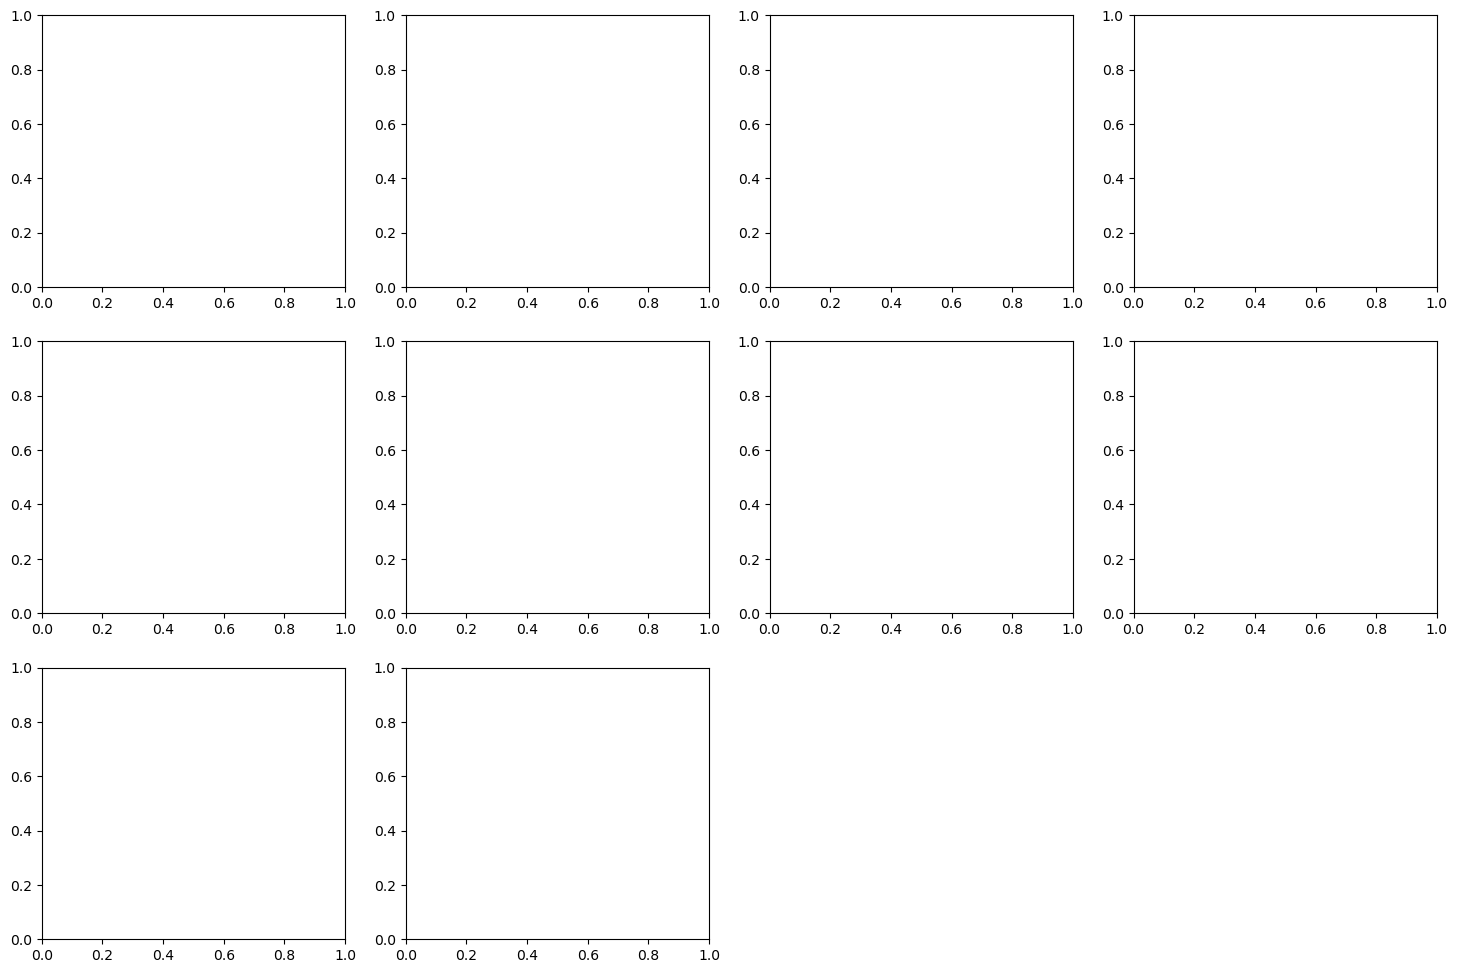

In [59]:
# Plot Latent Heat Flux Surface Anomaly VS Temperature Anomaly Graph For All 12 Models
Fig = pyplot.figure(figsize=(18,12))
Count=0
Latent_Sfc_Slopes = numpy.zeros((12,3))
Latent_Sfc_Std_Errors = numpy.zeros((12,3))
Latent_Sfc_Error_Bars = numpy.zeros((12,3))
for Model in list(Model_List):
    Count += 1
    if Model!="CCSM3" and Model!="CCSM3II":
#        print (Model)
        Axes = Fig.add_subplot(3,4, Count)
#
# Open Temperature Control and Temperature 4x Files Using Function
        Temp_Control, Years_Control, Temp_4x, Years_4x = Open_Temp_Files(Temp_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Temp_Control_Smooth = Temp_Smooth(Temp_Control, Years_Control, Temp_4x, Years_4x, Model)
#
# Calculate Temperature Anomaly
        Temp_Anomaly = Temp_4x - Temp_Control_Smooth
#
# Open Latent Heat Flux Surface Control and Latent Heat Flux Surface 4x Files Using Function
        Latent_Sfc_Control, Years_Control, Latent_Sfc_4x, Years_4x = Open_Latent_Sfc_Files(Latent_Sfc_Files, Model)
#
# Create Smoothen Temperature 4x and Control Lines Using Function
        Latent_Sfc_Control_Smooth = Temp_Smooth(Latent_Sfc_Control, Years_Control, Latent_Sfc_4x, Years_4x, Model)
#
# Calculate Latent Heat Flux Surface Anomaly
        Latent_Sfc_Anomaly = Latent_Sfc_4x - Latent_Sfc_Control_Smooth
#
# Calculate Correlation and Standard Deviations
        PI_Len = numpy.min([len(Temp_Control),len(Latent_Sfc_Control)])
        Latent_Sfc_Corr = Corr_IgnoreNaN(Temp_Control[:PI_Len],Latent_Sfc_Control[:PI_Len])
        Latent_Sfc_Std_x = float(numpy.std(Temp_Control))
        Latent_Sfc_Std_y = float(numpy.std(Latent_Sfc_Control))
#
#
# Plot Latent Heat Flux Surface Anomaly VS Temperature Anomaly
#        Years_1001_End = range(1001,len(Temp_Anomaly))
#        Axes.scatter(Temp_Anomaly[Years_1001_End], Latent_Sfc_Anomaly[Years_1001_End], c='dimgray', marker='o', s=48)
#        Axes.set_title(Model, fontsize=18)
#        pyplot.rc('xtick', labelsize=12)
#        pyplot.rc('ytick', labelsize=12)
#    pyplot.xlim(0,15)
#    pyplot.ylim(-4,22.5)
#
# Calculate and Plot OLS Linear Regression For Latent Heat Flux Surface Anomaly VS Temeprature Anomaly For 151-1000 Years
        Years_151_1000 = range(151,1000)
        Latent_Sfc_151_1000_Slope, Latent_Sfc_151_1000_Intercept, \
        Latent_Sfc_151_1000_Bias, Latent_Sfc_151_1000_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_151_1000], Latent_Sfc_Anomaly[Years_151_1000], Latent_Sfc_Corr, Latent_Sfc_Std_x, Latent_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_151_1000], Latent_Sfc_Anomaly[Years_151_1000], c='orange', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_151_1000], Latent_Sfc_151_1000_Predictions, c='firebrick', linewidth=3.8, \
#        label='Years 151-1000')
#        Axes.text(0.03, 0.68, str("%2.2f" % Latent_Sfc_151_1000_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='firebrick')
#
# Calculate and Plot OLS Linear Regression For Latent Heat Flux Surface Anomaly VS Temeprature Anomaly For 21-150 Years
        Years_21_150 = range(21,150)
        Latent_Sfc_21_150_Slope, Latent_Sfc_21_150_Intercept, \
        Latent_Sfc_21_150_Bias, Latent_Sfc_21_150_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_21_150], Latent_Sfc_Anomaly[Years_21_150], Latent_Sfc_Corr, Latent_Sfc_Std_x, Latent_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_21_150], Latent_Sfc_Anomaly[Years_21_150], c='deepskyblue', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_21_150], Latent_Sfc_21_150_Predictions, c='mediumblue', linewidth=3.8, \
#        label='Years 21-150')
#        Axes.text(0.03, 0.78, str("%2.2f" % Latent_Sfc_21_150_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='mediumblue')
#
# Calculate and Plot OLS Linear Regression For Latent Heat Flux Surface Anomaly VS Temeprature Anomaly For 1-20 Years
        Years_1_20 = range(20)
        Latent_Sfc_1_20_Slope, Latent_Sfc_1_20_Intercept, \
        Latent_Sfc_1_20_Bias, Latent_Sfc_1_20_Predictions = \
        New_York_Reg(Temp_Anomaly[Years_1_20], Latent_Sfc_Anomaly[Years_1_20], Latent_Sfc_Corr, Latent_Sfc_Std_x, Latent_Sfc_Std_y)
#        Axes.scatter(Temp_Anomaly[Years_1_20], Latent_Sfc_Anomaly[Years_1_20], c='lawngreen', marker='o', s=48)
#        Axes.plot(Temp_Anomaly[Years_1_20], Latent_Sfc_1_20_Predictions, c='darkgreen', linewidth=3.8, \
#        label='Years 1-20')
#        Axes.text(0.03, 0.88, str("%2.2f" % Latent_Sfc_1_20_Slope), ha='left', va='center', transform=Axes.transAxes, \
#        fontdict={'size':18},color='darkgreen')
#
# Store Regression Slopes Into Array
        Latent_Sfc_Slopes[Count-1][0] = Latent_Sfc_1_20_Slope
        Latent_Sfc_Slopes[Count-1][1] = Latent_Sfc_21_150_Slope
        Latent_Sfc_Slopes[Count-1][2] = Latent_Sfc_151_1000_Slope
        Latent_Sfc_Error_Bars[Count-1][0] = Latent_Sfc_1_20_Bias
        Latent_Sfc_Error_Bars[Count-1][1] = Latent_Sfc_21_150_Bias
        Latent_Sfc_Error_Bars[Count-1][2] = Latent_Sfc_151_1000_Bias
    else:
        Latent_Sfc_Slopes[Count-1][0] = numpy.nan
        Latent_Sfc_Slopes[Count-1][1] = numpy.nan
        Latent_Sfc_Slopes[Count-1][2] = numpy.nan
        Latent_Sfc_Error_Bars[Count-1][0] = numpy.nan
        Latent_Sfc_Error_Bars[Count-1][1] = numpy.nan
        Latent_Sfc_Error_Bars[Count-1][2] = numpy.nan
#  
# Add Legend
#    if Count==4:
#        Axes.plot([0,0], [0,0], c='firebrick', linewidth=2.8, label='Years 151-1000')
#        Axes.plot([0,0], [0,0], c='mediumblue', linewidth=2.8, label='Years 21-150')
#        Axes.plot([0,0], [0,0], c='darkgreen', linewidth=2.8, label='Years 1-20')
#        pyplot.legend(loc=1, fontsize=15)
#
# Set Axes Labels
#Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
#pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#pyplot.xlabel('Temperature Anomaly ($K$)', fontsize=18)
#pyplot.ylabel('Latent Heat Flux at Surface Anomaly ($W$ $m^{-2}$)', fontsize=18,labelpad=18)
#pyplot.tight_layout()
#
#
# Calculate Intermodel Mean
Latent_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Latent_Sfc_Slopes[k][i]
    Latent_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Latent_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Latent_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Latent_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Latent_Sfc_Slopes)
print (Latent_Sfc_Slope_Mean)
print (Latent_Sfc_Slope_Std)

In [60]:
# Calculate Net Surface Radiation Slope
Net_Sfc_Slopes = Down_LW_Sfc_Slopes + Down_SW_Sfc_Slopes - Up_LW_Sfc_Slopes - Up_SW_Sfc_Slopes
#
# Calculate Intermodel Mean
Net_Sfc_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Net_Sfc_Slopes[k][i]
    Net_Sfc_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Net_Sfc_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Net_Sfc_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Net_Sfc_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Net_Sfc_Slopes)
print (Net_Sfc_Slope_Mean)
print (Net_Sfc_Slope_Std)

[0.73292497 1.05004919 0.97960732]
[0.39281254 0.4584646  0.38855003]


In [61]:
# Create Net TOA Slopes Array
Net_TOA_Slopes = numpy.zeros((12,3))
for i in range(len(Net_TOA_Slopes)):
    for j in range(3):
        Net_TOA_Slopes[i][j] = Net_TOA_Slopes_DF.iloc[j,i+1]
#Net_TOA_Slopes
#
# Calculate Intermodel Mean
Net_TOA_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Net_TOA_Slopes[k][i]
    Net_TOA_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Net_TOA_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Net_TOA_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Net_TOA_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Net_TOA_Slopes)
print (Net_TOA_Slope_Mean)
print (Net_TOA_Slope_Std)

[-1.31401338 -0.9473869  -0.688201  ]
[0.55404373 0.41357901 0.29954771]


In [62]:
# Create Precip Slopes Array
Precip_Slopes = numpy.zeros((12,3))
for i in range(len(Precip_Slopes)):
    for j in range(3):
        Precip_Slopes[i][j] = Precip_Slopes_DF.iloc[j,i+1]
#
# Calculate Intermodel Mean
Precip_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Precip_Slopes[k][i]
    Precip_Slope_Mean[i] = Sum_Slopes / 10
#
# Calculate Intermodel Standard Deviation
Precip_Slope_Std = numpy.zeros(3)
for i in range(3):
    Slopes_List = []
    for k in range(12):
        if k != 10 and k != 11:
            Slopes_List.append(Precip_Slopes[k][i])
        Slopes_Column = numpy.array(Slopes_List)
#    print (Slopes_Column)
    Precip_Slope_Std[i] = numpy.std(Slopes_Column)
#print (Precip_Slopes)
print (Precip_Slope_Mean)
print (Precip_Slope_Std)

[2.24505576 2.13382446 1.94982453]
[0.37244115 0.27266373 0.17702051]


## Fig S2

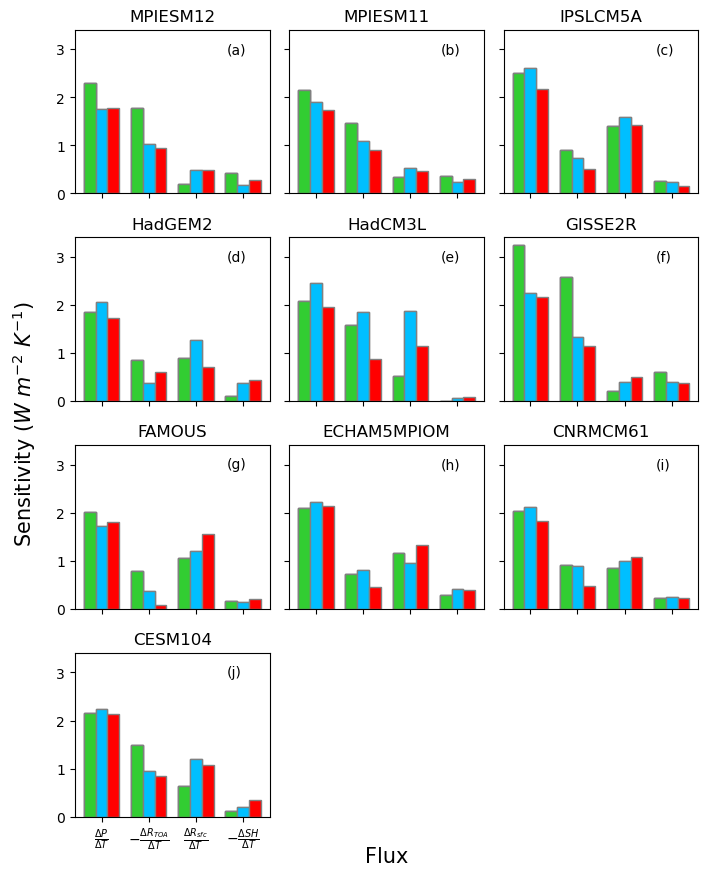

In [63]:
# Create Fig
Fig = pyplot.figure(figsize=(7.48,9.28))
Axes = Fig.subplots(4,3, sharex=True, sharey=True)
i = 0
j = -1
Count = -1
for Model in list(Model_List):
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1
    Count += 1
#
# Set Bar Graph Bar Heights and Bar Widths
    if Model != "CCSM3" and Model != "CCSM3II":
        Axes[i][j].set_title(Model, fontsize=12)
        Bar_Height = numpy.zeros((3,4))
        for k in range(3):
            Bar_Height[k][0] = Precip_Slopes[Count][k]
            Bar_Height[k][1] = Net_TOA_Slopes[Count][k] * -1
            Bar_Height[k][2] = Net_Sfc_Slopes[Count][k]
            Bar_Height[k][3] = Sensi_Sfc_Slopes[Count][k] * -1
            Bar_Width = 0.25
            Bar_1_20 = numpy.arange(len(Bar_Height[0])) - Bar_Width
            Bar_21_150 = [x + Bar_Width for x in Bar_1_20]
            Bar_151_1000 = [x + Bar_Width for x in Bar_21_150]
#
# Plot Bar Graph of Different Regression Slopes VS Temperature Anomaly
            Axes[i][j].bar(Bar_1_20, Bar_Height[0], color ='limegreen', width = Bar_Width,
            edgecolor ='grey', label ='Years 1-20')
            Axes[i][j].bar(Bar_21_150, Bar_Height[1], color ='deepskyblue', width = Bar_Width,
            edgecolor ='grey', label ='Years 21-150')
            Axes[i][j].bar(Bar_151_1000, Bar_Height[2], color ='red', width = Bar_Width,
            edgecolor ='grey', label ='Years 151-1000')
#
# Set x Axis Labels
        pyplot.xticks([r for r in range(len(Bar_Height[0]))], \
        [r'$\frac{\Delta P}{\Delta T}$', r'$-\frac{\Delta R_{TOA}}{\Delta T}$', \
        r'$\frac{\Delta R_{sfc}}{\Delta T}$', r'$-\frac{\Delta SH}{\Delta T}$'], fontsize=11)
        pyplot.yticks(fontsize=10)
    if Count == 10 or Count == 11:
        Axes[i][j].set(visible=False)
#
# Add Alphabet Label
    Alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
    if Count != 11 and Count != 12:
        Axes[i][j].text(0.78, 0.88, str("("+Alphabets[Count]+")"), ha='left', va='center', \
        transform=Axes[i][j].transAxes, fontdict={'size':10},color='black')
        
#
# Add Legend
#    if Count == 12:
#        Axes[i][j].plot([0,0], [0,0], c='limegreen', linewidth=2.8, label='1-20')
#        Axes[i][j].plot([0,0], [0,0], c='deepskyblue', linewidth=2.8, label='21-150')
#        Axes[i][j].plot([0,0], [0,0], c='red', linewidth=2.8, label='151-1000')    
#        pyplot.legend(loc=1, fontsize=8)
#
# Set Axes Labels
Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pyplot.xlabel('Flux', fontsize=15)
pyplot.ylabel('Sensitivity ($W$ $m^{-2}$ $K^{-1}$)', fontsize=15)
pyplot.tight_layout()
#Fig.savefig('Energy_Fluxes_All.png', bbox_inches='tight')
#Fig.savefig('figures/FIGURE_S2.eps', bbox_inches='tight')

## Fig S3

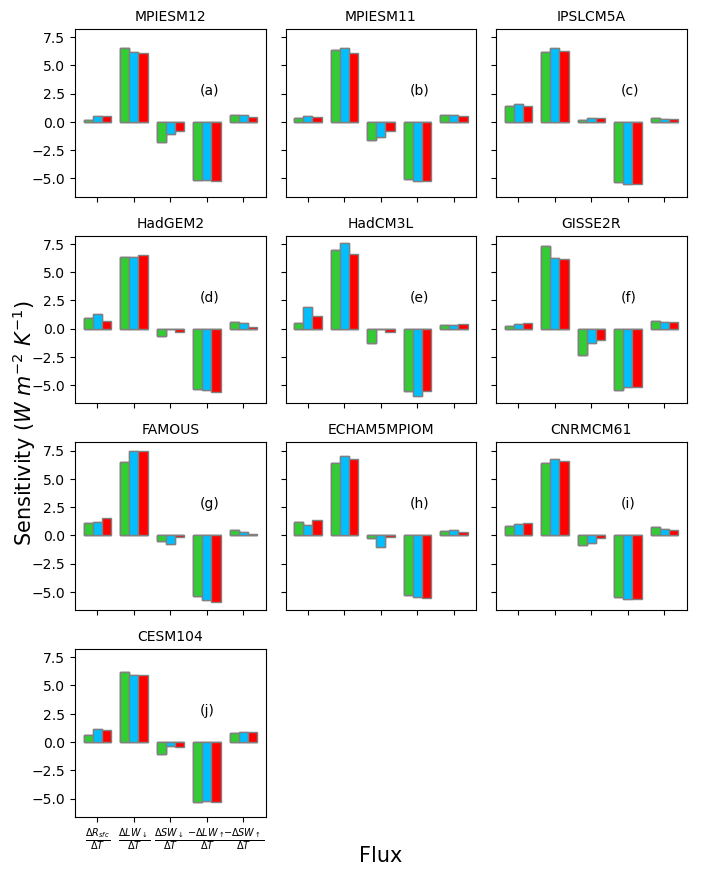

In [64]:
# Create Fig
Fig = pyplot.figure(figsize=(7.48,9.28))
Axes = Fig.subplots(4,3, sharex=True, sharey=True)
i = 0
j = -1
Count = -1
for Model in list(Model_List):
    if j < 2:
        j += 1
    else:
        j = 0
        i += 1
    Count += 1
#
# Set Bar Graph Bar Heights and Bar Widths
    if Model != "CCSM3" and Model != "CCSM3II":
        Axes[i][j].set_title(Model, fontsize=10)
        Bar_Height = numpy.zeros((3,5))
        for k in range(3):
            Bar_Height[k][0] = Net_Sfc_Slopes[Count][k]
            Bar_Height[k][1] = Down_LW_Sfc_Slopes[Count][k]
            Bar_Height[k][2] = Down_SW_Sfc_Slopes[Count][k]
            Bar_Height[k][3] = Up_LW_Sfc_Slopes[Count][k] * -1
            Bar_Height[k][4] = Up_SW_Sfc_Slopes[Count][k] * -1
            Bar_Width = 0.25
            Bar_1_20 = numpy.arange(len(Bar_Height[0])) - Bar_Width
            Bar_21_150 = [x + Bar_Width for x in Bar_1_20]
            Bar_151_1000 = [x + Bar_Width for x in Bar_21_150]
#
# Plot Bar Graph of Different Regression Slopes VS Temperature Anomaly
            Axes[i][j].bar(Bar_1_20, Bar_Height[0], color ='limegreen', width = Bar_Width,
            edgecolor ='grey', label ='Years 1-20')
            Axes[i][j].bar(Bar_21_150, Bar_Height[1], color ='deepskyblue', width = Bar_Width,
            edgecolor ='grey', label ='Years 21-150')
            Axes[i][j].bar(Bar_151_1000, Bar_Height[2], color ='red', width = Bar_Width,
            edgecolor ='grey', label ='Years 151-1000')
#
# Set x Axis Labels
        pyplot.xticks([r for r in range(len(Bar_Height[0]))], [r'$\frac{\Delta R_{sfc}}{\Delta T}$', \
        r'$\frac{\Delta LW_{\downarrow}}{\Delta T}$', r'$\frac{\Delta SW_{\downarrow}}{\Delta T}$', \
        r'$\frac{-\Delta LW_{\uparrow}}{\Delta T}$', r'$\frac{-\Delta SW_{\uparrow}}{\Delta T}$'], fontsize=8)
    if Count == 10 or Count == 11:
        Axes[i][j].set(visible=False)
#
# Add Alphabet Label
    Alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
    if Count != 11 and Count != 12:
        Axes[i][j].text(2.8, 2.8, str("("+Alphabets[Count]+")"), ha='left', va='center', #transform=Axes.transAxes, \
        fontdict={'size':10},color='black')
#
# Add Legend
#    if Count == 12:
#        Axes[i][j].plot([0,0], [0,0], c='limegreen', linewidth=2.8, label='1-20')
#        Axes[i][j].plot([0,0], [0,0], c='deepskyblue', linewidth=2.8, label='21-150')
#        Axes[i][j].plot([0,0], [0,0], c='red', linewidth=2.8, label='151-1000')    
#        pyplot.legend(loc=1, fontsize=8)
#
# Set Axes Labels
Fig.add_subplot(111, frameon=False)
# Hide Tick and Tick Label of the Big Axis
pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pyplot.xlabel('Flux', fontsize=15)
pyplot.ylabel('Sensitivity ($W$ $m^{-2}$ $K^{-1}$)', fontsize=15)
#pyplot.rc('ytick', labelsize=8)
pyplot.tight_layout()
#Fig.savefig('Surface_Fluxes_All.png', bbox_inches='tight')
#Fig.savefig('figures/FIGURE_S3.eps', bbox_inches='tight')

[[0.39281254 0.33115614 0.70726805 0.1315187  0.15660249]
 [0.4584646  0.51515897 0.55675873 0.24621253 0.180268  ]
 [0.38855003 0.42506833 0.39259496 0.20920187 0.22623769]]


Text(0, 0.5, 'Slope ($W$ $m^{-2}$ $K^{-1}$)')

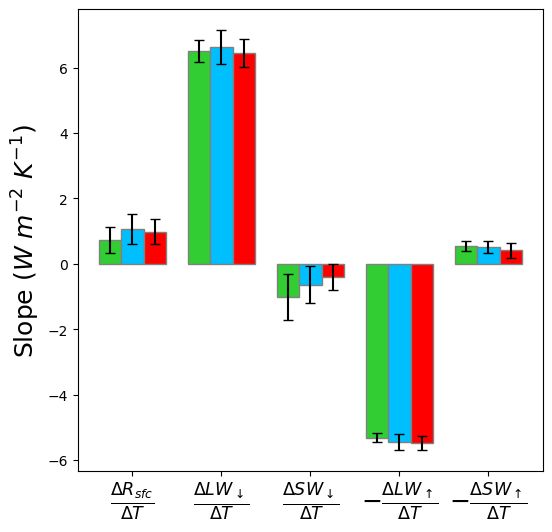

In [65]:
# Create Surface Fluxes Intermodel Mean Bar Graph
Fig = pyplot.figure(figsize=(6,6))
#
# Set Bar Heights
Bar_Height = numpy.zeros((3,5))
for i in range(3):
    Bar_Height[i][0] = Net_Sfc_Slope_Mean[i]
    Bar_Height[i][1] = Down_LW_Sfc_Slope_Mean[i]
    Bar_Height[i][2] = Down_SW_Sfc_Slope_Mean[i]
    Bar_Height[i][3] = Up_LW_Sfc_Slope_Mean[i] * -1
    Bar_Height[i][4] = Up_SW_Sfc_Slope_Mean[i] * -1
#
# Set Error Bars
Error_Bar = numpy.zeros((3,5))
for i in range(3):
    Error_Bar[i][0] = Net_Sfc_Slope_Std[i]
    Error_Bar[i][1] = Down_LW_Sfc_Slope_Std[i]
    Error_Bar[i][2] = Down_SW_Sfc_Slope_Std[i]
    Error_Bar[i][3] = Up_LW_Sfc_Slope_Std[i]
    Error_Bar[i][4] = Up_SW_Sfc_Slope_Std[i]
print (Error_Bar)
#
# Set Bar Widths
Bar_Width = 0.25
Bar_1_20 = numpy.arange(len(Bar_Height[0])) - Bar_Width
Bar_21_150 = [x + Bar_Width for x in Bar_1_20]
Bar_151_1000 = [x + Bar_Width for x in Bar_21_150]
#
# Plot Bar Graph of Different Regression Slopes VS Temperature Anomaly
pyplot.bar(Bar_1_20, Bar_Height[0], yerr = Error_Bar[0], color ='limegreen', width = Bar_Width,
edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 1-20')
pyplot.bar(Bar_21_150, Bar_Height[1], yerr = Error_Bar[1], color ='deepskyblue', width = Bar_Width,
edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 21-150')
pyplot.bar(Bar_151_1000, Bar_Height[2], yerr = Error_Bar[2], color ='red', width = Bar_Width,
edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 151-1000')
#
# Set x Axis Labels
pyplot.xticks([r for r in range(len(Bar_Height[0]))], [r'$\frac{\Delta R_{sfc}}{\Delta T}$', \
r'$\frac{\Delta LW_{\downarrow}}{\Delta T}$', r'$\frac{\Delta SW_{\downarrow}}{\Delta T}$', \
r'$-\frac{\Delta LW_{\uparrow}}{\Delta T}$', r'$-\frac{\Delta SW_{\uparrow}}{\Delta T}$'], fontsize=18)
pyplot.yticks(fontsize=10)
#
# Formatting
pyplot.ylabel('Slope ($W$ $m^{-2}$ $K^{-1}$)', fontsize=18)
#pyplot.title("Intermodel Mean of Surface Radiative Fluxes Sensitivity", fontsize=28)
#Fig.savefig('Surface_Fluxes_Mean.png', bbox_inches='tight')

[[0.37244115 0.55404373 0.39281254 0.16591103]
 [0.27266373 0.41357901 0.4584646  0.10861344]
 [0.17702051 0.29954771 0.38855003 0.10339072]]


Text(0, 0.5, 'Slope ($W$ $m^{-2}$ $K^{-1}$)')

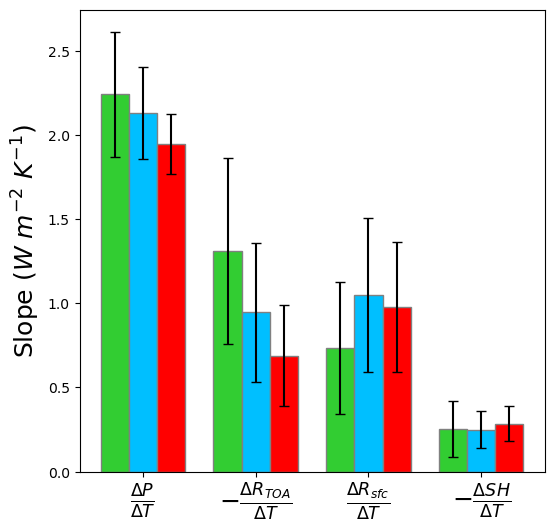

In [66]:
# Create Surface Fluxes Intermodel Mean Bar Graph
Fig = pyplot.figure(figsize=(6,6))
#
# Set Bar Heights
Bar_Height = numpy.zeros((3,4))
for i in range(3):
    Bar_Height[i][0] = Precip_Slope_Mean[i]
    Bar_Height[i][1] = Net_TOA_Slope_Mean[i] * -1
    Bar_Height[i][2] = Net_Sfc_Slope_Mean[i]
    Bar_Height[i][3] = Sensi_Sfc_Slope_Mean[i] * -1
#
# Set Error Bars
Error_Bar = numpy.zeros((3,4))
for i in range(3):
    Error_Bar[i][0] = Precip_Slope_Std[i]
    Error_Bar[i][1] = Net_TOA_Slope_Std[i]
    Error_Bar[i][2] = Net_Sfc_Slope_Std[i]
    Error_Bar[i][3] = Sensi_Sfc_Slope_Std[i]
print (Error_Bar)
#
# Set Bar Graph Bar Heights and Bar Widths
Bar_Width = 0.25
Bar_1_20 = numpy.arange(len(Bar_Height[0])) - Bar_Width
Bar_21_150 = [x + Bar_Width for x in Bar_1_20]
Bar_151_1000 = [x + Bar_Width for x in Bar_21_150]
#
# Plot Bar Graph of Different Regression Slopes VS Temperature Anomaly
pyplot.bar(Bar_1_20, Bar_Height[0], yerr = Error_Bar[0], color ='limegreen', width = Bar_Width,
edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 1-20')
pyplot.bar(Bar_21_150, Bar_Height[1], yerr = Error_Bar[1], color ='deepskyblue', width = Bar_Width,
edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 21-150')
pyplot.bar(Bar_151_1000, Bar_Height[2], yerr = Error_Bar[2], color ='red', width = Bar_Width,
edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 151-1000')
#
# Set x Axis Labels
pyplot.xticks([r for r in range(len(Bar_Height[0]))], \
[r'$\frac{\Delta P}{\Delta T}$', r'$-\frac{\Delta R_{TOA}}{\Delta T}$', \
r'$\frac{\Delta R_{sfc}}{\Delta T}$', r'$-\frac{\Delta SH}{\Delta T}$'], fontsize=18)
pyplot.yticks(fontsize=10)
#
# Formatting
pyplot.ylabel('Slope ($W$ $m^{-2}$ $K^{-1}$)', fontsize=18)
#pyplot.title("Intermodel Mean of Energy Fluxes Sensitivity", fontsize=28)
#Fig.savefig('Energy_Fluxes_Mean.png', bbox_inches='tight')

## Figure 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


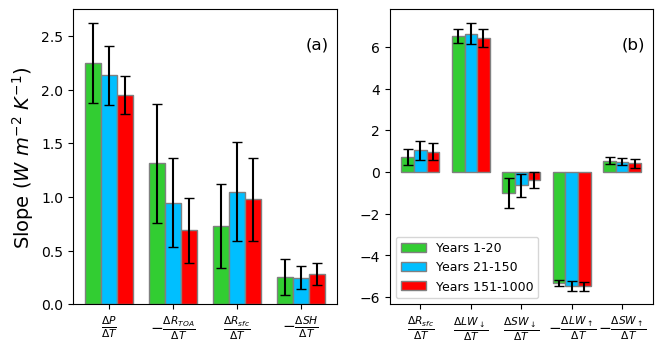

In [67]:
Fig = pyplot.figure(figsize=(7.48,3.83))
Count = 0
for i in range(2):
#
# Plot Linear Regression Slopes For Precip Anomaly VS Temeprature Anomaly By Time Period
    Count += 1
    Axes = Fig.add_subplot(1,2, Count)
    if Count == 1:
        #
        # Set Bar Heights
        Bar_Height = numpy.zeros((3,4))
        for i in range(3):
            Bar_Height[i][0] = Precip_Slope_Mean[i]
            Bar_Height[i][1] = Net_TOA_Slope_Mean[i] * -1
            Bar_Height[i][2] = Net_Sfc_Slope_Mean[i]
            Bar_Height[i][3] = Sensi_Sfc_Slope_Mean[i] * -1
        #
        # Set Error Bars
        Error_Bar = numpy.zeros((3,4))
        for i in range(3):
            Error_Bar[i][0] = Precip_Slope_Std[i]
            Error_Bar[i][1] = Net_TOA_Slope_Std[i]
            Error_Bar[i][2] = Net_Sfc_Slope_Std[i]
            Error_Bar[i][3] = Sensi_Sfc_Slope_Std[i]
        #
        # Set Bar Graph Bar Heights and Bar Widths
        Bar_Width = 0.25
        Bar_1_20 = numpy.arange(len(Bar_Height[0])) - Bar_Width
        Bar_21_150 = [x + Bar_Width for x in Bar_1_20]
        Bar_151_1000 = [x + Bar_Width for x in Bar_21_150]
        #
        # Plot Bar Graph of Different Regression Slopes VS Temperature Anomaly
        pyplot.bar(Bar_1_20, Bar_Height[0], yerr = Error_Bar[0], color ='limegreen', width = Bar_Width,
        edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 1-20')
        pyplot.bar(Bar_21_150, Bar_Height[1], yerr = Error_Bar[1], color ='deepskyblue', width = Bar_Width,
        edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 21-150')
        pyplot.bar(Bar_151_1000, Bar_Height[2], yerr = Error_Bar[2], color ='red', width = Bar_Width,
        edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 151-1000')
        #
        # Set x Axis Labels
        pyplot.xticks([r for r in range(len(Bar_Height[0]))], \
        [r'$\frac{\Delta P}{\Delta T}$', r'$-\frac{\Delta R_{TOA}}{\Delta T}$', \
        r'$\frac{\Delta R_{sfc}}{\Delta T}$', r'$-\frac{\Delta SH}{\Delta T}$'], fontsize=11)
        pyplot.yticks(fontsize=10)
        #
        # Formatting
        Axes.text(0.88, 0.88, str("(a)"), ha='left', va='center', transform=Axes.transAxes, \
        fontdict={'size':12},color='black')
        pyplot.ylabel('Slope ($W$ $m^{-2}$ $K^{-1}$)', fontsize=14)
#
#
# Plot Linear Regression Slopes For Net TOA Anomaly VS Temeprature Anomaly By Time Period
    elif Count == 2:
        #
        # Set Bar Heights
        Bar_Height = numpy.zeros((3,5))
        for i in range(3):
            Bar_Height[i][0] = Net_Sfc_Slope_Mean[i]
            Bar_Height[i][1] = Down_LW_Sfc_Slope_Mean[i]
            Bar_Height[i][2] = Down_SW_Sfc_Slope_Mean[i]
            Bar_Height[i][3] = Up_LW_Sfc_Slope_Mean[i] * -1
            Bar_Height[i][4] = Up_SW_Sfc_Slope_Mean[i] * -1
        #
        # Set Error Bars
        Error_Bar = numpy.zeros((3,5))
        for i in range(3):
            Error_Bar[i][0] = Net_Sfc_Slope_Std[i]
            Error_Bar[i][1] = Down_LW_Sfc_Slope_Std[i]
            Error_Bar[i][2] = Down_SW_Sfc_Slope_Std[i]
            Error_Bar[i][3] = Up_LW_Sfc_Slope_Std[i]
            Error_Bar[i][4] = Up_SW_Sfc_Slope_Std[i]
        #
        # Set Bar Graph Bar Heights and Bar Widths
        Bar_Width = 0.25
        Bar_1_20 = numpy.arange(len(Bar_Height[0])) - Bar_Width
        Bar_21_150 = [x + Bar_Width for x in Bar_1_20]
        Bar_151_1000 = [x + Bar_Width for x in Bar_21_150]
        #
        # Plot Bar Graph of Different Regression Slopes VS Temperature Anomaly
        pyplot.bar(Bar_1_20, Bar_Height[0], yerr = Error_Bar[0], color ='limegreen', width = Bar_Width,
        edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 1-20')
        pyplot.bar(Bar_21_150, Bar_Height[1], yerr = Error_Bar[1], color ='deepskyblue', width = Bar_Width,
        edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 21-150')
        pyplot.bar(Bar_151_1000, Bar_Height[2], yerr = Error_Bar[2], color ='red', width = Bar_Width,
        edgecolor ='grey', ecolor='black', capsize=3.8, label ='Years 151-1000')
        #
        # Set x Axis Labels
        pyplot.xticks([r for r in range(len(Bar_Height[0]))], [r'$\frac{\Delta R_{sfc}}{\Delta T}$', \
        r'$\frac{\Delta LW_{\downarrow}}{\Delta T}$', r'$\frac{\Delta SW_{\downarrow}}{\Delta T}$', \
        r'$-\frac{\Delta LW_{\uparrow}}{\Delta T}$', r'$-\frac{\Delta SW_{\uparrow}}{\Delta T}$'], fontsize=11)
        pyplot.yticks(fontsize=10)
        #
        # Formatting
        Axes.text(0.88, 0.88, str("(b)"), ha='left', va='center', transform=Axes.transAxes, \
        fontdict={'size':12},color='black')
        pyplot.legend(loc=3, fontsize=9)
#
Fig.savefig('figures/FIGURE_3.eps', bbox_inches='tight')

In [68]:
Net_Rad_Sfc_Slopes = Net_Sfc_Slope_Mean

In [69]:
# Calculate Sum of All Fluxes
Sum_All_Slopes = Precip_Slopes + Net_TOA_Slopes - Net_Rad_Sfc_Slopes + Sensi_Sfc_Slopes
#
# Calculate Intermodel Mean
Sum_All_Slope_Mean = numpy.zeros(3)
for i in range(3):
    Sum_Slopes = 0
    for k in range(12):
        if k != 10 and k != 11:
            Sum_Slopes += Sum_All_Slopes[k][i]
    Sum_All_Slope_Mean[i] = Sum_Slopes / 10
print (Sum_All_Slopes)
print (Sum_All_Slope_Mean)

[[-0.63074221 -0.51958915 -0.42303038]
 [-0.42034423 -0.47137971 -0.44208629]
 [ 0.61183479  0.58062204  0.50731347]
 [ 0.16117632  0.24893093 -0.27890392]
 [-0.24101511 -0.5124315   0.01383898]
 [-0.66661624 -0.52795851 -0.35624761]
 [ 0.30880941  0.15043897  0.55383129]
 [ 0.35179556 -0.04019903  0.30568407]
 [ 0.15529109 -0.07325094  0.13897145]
 [-0.18573882  0.04013533 -0.05057466]
 [        nan         nan         nan]
 [        nan         nan         nan]]
[-0.05555494 -0.11246816 -0.00312036]


In [70]:
print (Precip_Slopes)
print (Net_TOA_Slopes * -1)
print (Net_Rad_Sfc_Slopes)
print (Sensi_Sfc_Slopes * -1)

[[2.30025397 1.7470528  1.77654175]
 [2.14878243 1.89665645 1.74058626]
 [2.50692102 2.60843875 2.16583736]
 [1.85860748 2.05891452 1.74088342]
 [2.08344487 2.45846809 1.96897908]
 [3.24633947 2.259853   2.1678214 ]
 [2.00894792 1.72722735 1.81875033]
 [2.10342482 2.22818205 2.13942438]
 [2.03168778 2.11523752 1.83964864]
 [2.16214781 2.23821408 2.13977271]
 [2.45982122 2.3190245  1.85932313]
 [2.29304299 1.66257113 1.44025792]]
[[1.78079254 1.03597305 0.93680532]
 [1.47540994 1.0837206  0.90902402]
 [0.91025586 0.74577452 0.51383312]
 [0.8611141  0.38770769 0.60673099]
 [1.58623564 1.86198116 0.87786251]
 [2.57449558 1.33100566 1.15753913]
 [0.79848226 0.37683889 0.078403  ]
 [0.72968189 0.81183068 0.46093749]
 [0.92325253 0.89656837 0.48429654]
 [1.50041343 0.94246835 0.85657789]
 [2.19543874 1.70016186 1.1955304 ]
 [       nan        nan        nan]]
[0.73292497 1.05004919 0.97960732]
[[0.41727867 0.18061971 0.28315949]
 [0.36079176 0.23426637 0.29404122]
 [0.25190541 0.231993   0.1